<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#数据结构" data-toc-modified-id="数据结构-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>数据结构</a></span><ul class="toc-item"><li><span><a href="#Series" data-toc-modified-id="Series-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Series</a></span><ul class="toc-item"><li><span><a href="#查找" data-toc-modified-id="查找-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>查找</a></span></li></ul></li><li><span><a href="#DataFrame" data-toc-modified-id="DataFrame-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>DataFrame</a></span><ul class="toc-item"><li><span><a href="#insert()-添加列" data-toc-modified-id="insert()-添加列-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>insert() 添加列</a></span></li><li><span><a href="#isin()-判断" data-toc-modified-id="isin()-判断-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>isin() 判断</a></span></li></ul></li></ul></li><li><span><a href="#数据操作" data-toc-modified-id="数据操作-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>数据操作</a></span><ul class="toc-item"><li><span><a href="#读取数据" data-toc-modified-id="读取数据-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>读取数据</a></span><ul class="toc-item"><li><span><a href="#pandas.read_csv()" data-toc-modified-id="pandas.read_csv()-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>pandas.read_csv()</a></span></li></ul></li><li><span><a href="#显示" data-toc-modified-id="显示-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>显示</a></span><ul class="toc-item"><li><span><a href="#DataFrame.head()-/-DataFrame.tail()" data-toc-modified-id="DataFrame.head()-/-DataFrame.tail()-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>DataFrame.head() / DataFrame.tail()</a></span></li><li><span><a href="#DataFrame.describe()" data-toc-modified-id="DataFrame.describe()-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>DataFrame.describe()</a></span></li><li><span><a href="#df.loc[-]、df.iloc[-]：选择行、列" data-toc-modified-id="df.loc[-]、df.iloc[-]：选择行、列-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>df.loc[ ]、df.iloc[ ]：选择行、列</a></span></li><li><span><a href="#使用matplotlib" data-toc-modified-id="使用matplotlib-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>使用matplotlib</a></span></li></ul></li></ul></li></ul></div>

In [2]:
import pandas as pd

# 数据结构
DataFrame可以理解为Excel中的一张表，Series可以理解为一张Excel表的一行或一列数据。

## Series
`pandas.Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)`

Series = 索引 + 一维数组


- index：设置索引，长度需要与数据相同。可重复。重排后索引不改变。默认为0,1,2... 

In [42]:
s = pd.Series([1,3,6,np.nan,44,1])
print(s,'\n')
print(s.sort_values())                 # 排序后，对应的索引保持不变

0     1.0
1     3.0
2     6.0
3     NaN
4    44.0
5     1.0
dtype: float64 

0     1.0
5     1.0
1     3.0
2     6.0
4    44.0
3     NaN
dtype: float64


In [54]:
# 使用index创建索引
s = pd.Series([1,3,6,np.nan,44,1], index=['a', 'b', 'c', 'd', 'e', 'e'])
print(s,'\n')
print(s['e'])         # 重复时，将所有的列出

a     1.0
b     3.0
c     6.0
d     NaN
e    44.0
e     1.0
dtype: float64 

e    44.0
e     1.0
dtype: float64


In [55]:
# 使用字典创建
s = pd.Series({'a': 1.0, 'b': 3.0, 'c': 6.0, 'd': np.nan, 'e': 44.0})
print(s)

a     1.0
b     3.0
c     6.0
d     NaN
e    44.0
dtype: float64


### 查找

`Series[条件、索引]`

`Series.loc[]`：切片

In [62]:
s = pd.Series({'a': 1.0, 'b': 3.0, 'c': 6.0, 'd': np.nan, 'e': 44.0})

print(s[s>5],'\n')       # 条件判断
print(s['d'])

c     6.0
e    44.0
dtype: float64 

nan


In [58]:
s = pd.Series({'a': 1.0, 'b': 3.0, 'c': 6.0, 'd': np.nan, 'e': 44.0})
print(s.loc['a':'d'])

a    1.0
b    3.0
c    6.0
d    NaN
dtype: float64


## DataFrame
`DataFrame([data, index, columns, dtype, copy])	`

In [69]:
# 字典创建
df = pd.DataFrame({'单价': [100, 200, 30], '数量': [3, 3, 10]}, 
                  index=['T001', 'T002', 'T003']) 
print(df)

       单价  数量
T001  100   3
T002  200   3
T003   30  10


In [65]:
# 使用series创建
price = pd.Series([100, 200, 30], index=['T001', 'T002', 'T005'])
quantity = pd.Series([3, 3, 10, 2], index=['T001', 'T002', 'T003', 'T004'])
df = pd.DataFrame({'单价': price, '数量': quantity})
print(df)

         单价    数量
T001  100.0   3.0
T002  200.0   3.0
T003    NaN  10.0
T004    NaN   2.0
T005   30.0   NaN


### insert() 添加列
`DataFrame.insert(loc, column, value)`
- loc : (int) 0 <= loc <= len(columns)
- column : 列名
- value : int, Series, or array-like

### isin() 判断
`DataFrame = DataFrame.isin(values)`：返回bool, 每个数据是否为values

`DataFrame = DataFrame[DataFrame.isin(values)]`：返回符合的数据集

`DataFrame = DataFrame[~DataFrame.isin(values)]`：返回不符合的数据集

- values : iterable, Series, DataFrame or dict

In [15]:
df = pd.DataFrame({'num_legs': [2, 4], 'num_wings': [2, 0]}, 
                  index=['falcon', 'dog'])
print(df,'\n')

print(df.isin([0, 2]),'\n')


        num_legs  num_wings
falcon         2          2
dog            4          0 

        num_legs  num_wings
falcon      True       True
dog        False       True 



In [22]:
# 只显示选定列
print(df['num_wings'].isin([0, 4]),'\n')

# 显示所有列，但其余列都为false
print(df.isin({'num_wings': [0, 4]}),'\n')

# 显示符合的数据
print(df[df['num_wings'].isin([0, 4])],'\n')

# 显示不符合的数据
print(df[~df['num_wings'].isin([0, 4])])

falcon    False
dog        True
Name: num_wings, dtype: bool 

        num_legs  num_wings
falcon     False      False
dog        False       True 

     num_legs  num_wings
dog         4          0 

        num_legs  num_wings
falcon         2          2


# 数据操作

## 读取数据

### pandas.read_csv()
`DataFrame = pandas.read_csv(file, sep=',', header='infer', names=None, prefix=None)`

读取CSV文件 (逗号分隔值Comma-Separated Values) 到DataFrame
- sep：分隔符
- header：int/int_list，设置第X行为列名
- names：str，设置列名
- prefix：str，设置列名前缀，使用names则无效
- chunksize：int，一次读取的值(大文件)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv

## 显示

### DataFrame.head() / DataFrame.tail()
`DataFrame = DataFrame.head(5)`

返回数据集前/后几行，不能重复使用

In [22]:
df = pd.DataFrame({'animal':['alligator', 'bee', 'falcon', 'lion', 'monkey', 'parrot', 'shark', 'whale', 'zebra']})

print(df)
df.head()
df.tail(3)

      animal
0  alligator
1        bee
2     falcon
3       lion
4     monkey
5     parrot
6      shark
7      whale
8      zebra


,animal
6,shark
7,whale
8,zebra


In [23]:
df.head()

,animal
0,alligator
1,bee
2,falcon
3,lion
4,monkey


### DataFrame.describe()
`DataFrame = DataFrame.describe(percentiles=[.25, .5, .75], include=None, exclude=None)`

显示数据的统计信息：
- 数字：count, max, min ...
- 对象：count, unique(种类数), top, freq(最多类型出现次数)
- DataFrame：默认只显示数字列的统计(include='all'修改)



https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

In [16]:
# 对象
s = pd.Series(['a', 'a', 'b', 'c'])
s.describe()

count     4
unique    3
top       a
freq      2
dtype: object

In [15]:
# 数字
s = pd.Series([1, 2, 3])
s.describe()

count    3.0
mean     2.0
std      1.0
min      1.0
25%      1.5
50%      2.0
75%      2.5
max      3.0
dtype: float64

In [26]:
# DataFrame
df = pd.DataFrame({'categorical': pd.Categorical(['d','e','f']),
                    'numeric': [1, 2, 3],
                    'object': ['a', 'b', 'c']
                   })
df.describe()

,numeric
count,3.0
mean,2.0
std,1.0
min,1.0
25%,1.5
50%,2.0
75%,2.5
max,3.0


In [27]:
df.describe(include="all")

,categorical,numeric,object
count,3,3.0,3
unique,3,NaN,3
top,f,NaN,b
freq,1,NaN,1
mean,NaN,2.0,NaN
std,NaN,1.0,NaN
min,NaN,1.0,NaN
25%,NaN,1.5,NaN
50%,NaN,2.0,NaN
75%,NaN,2.5,NaN


In [31]:
df.describe(exclude=[np.number])

,categorical,object
count,3,3
unique,3,3
top,f,b
freq,1,1


In [32]:
df.describe(include=[np.object])

,object
count,3
unique,3
top,b
freq,1


### df.loc[ ]、df.iloc[ ]：选择行、列
loc可以通过行号和行标签进行索引，比如 df.loc['a'] , df.loc[1]

iloc只能通过行号索引 , df.iloc[0] 是对的, 而df.iloc['a'] 是错误的

In [105]:
# 获取行
data=pd.DataFrame(np.arange(16).reshape(4,4),index=list('abcd'),columns=list('ABCD'))
print(data,'\n')

print(data.loc['a'],'\n')           # 'a'行的数据
print(data.loc['c':],'\n')          # 'c'到最后
print(data.iloc[0])                 # 第一行的数据

    A   B   C   D
a   0   1   2   3
b   4   5   6   7
c   8   9  10  11
d  12  13  14  15 

A    0
B    1
C    2
D    3
Name: a, dtype: int64 

    A   B   C   D
c   8   9  10  11
d  12  13  14  15 

A    0
B    1
C    2
D    3
Name: a, dtype: int64


In [100]:
# 获取列
print(data.loc[:,['A','B']],'\n')          # 'A','B'列的所有数据
print(data.iloc[1:3,[0]])                  # 第一列，2到行的数据

# 获取所有数据
print(data.loc[:,:])
print(data.iloc[:,:])

    A   B
a   0   1
b   4   5
c   8   9
d  12  13 

   A
b  4
c  8
    A   B   C   D
a   0   1   2   3
b   4   5   6   7
c   8   9  10  11
d  12  13  14  15
    A   B   C   D
a   0   1   2   3
b   4   5   6   7
c   8   9  10  11
d  12  13  14  15


In [103]:
# 使用条件筛选
print(data.loc[data['A']>3])


    A   B   C   D
b   4   5   6   7
c   8   9  10  11
d  12  13  14  15
    A   B   C   D
c   8   9  10  11
d  12  13  14  15


### 使用matplotlib
`data.plot()`

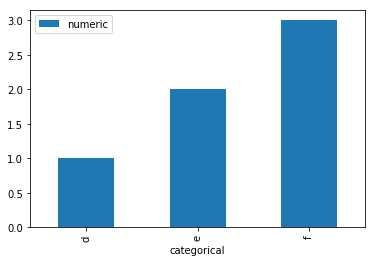

In [80]:
df = pd.DataFrame({'categorical': pd.Categorical(['d','e','f']),
                    'numeric': [1, 2, 3]
                   })
df.plot(kind='bar',x='categorical',y='numeric')